In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D, Flatten

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Ethereum/ETH-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,155.286407,156.691299,151.225342,152.539688,152.539688,6565950868
1,2019-12-01,152.491928,152.491928,147.067932,151.185730,151.185730,7102780298
2,2019-12-02,151.175476,152.116959,147.606796,149.059158,149.059158,6670561362
3,2019-12-03,149.058243,150.310425,146.001678,147.956421,147.956421,6204379850
4,2019-12-04,147.918381,150.680817,145.000885,146.747742,146.747742,7865937094
...,...,...,...,...,...,...,...
1092,2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
1093,2022-11-27,1205.905273,1220.349487,1195.039063,1195.126953,1195.126953,4486976868
1094,2022-11-28,1194.960327,1198.737671,1156.062500,1170.086182,1170.086182,7275411870
1095,2022-11-29,1169.874390,1222.164185,1163.477539,1216.901245,1216.901245,7639405818


# **Data Pre-processing**

In [4]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [5]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

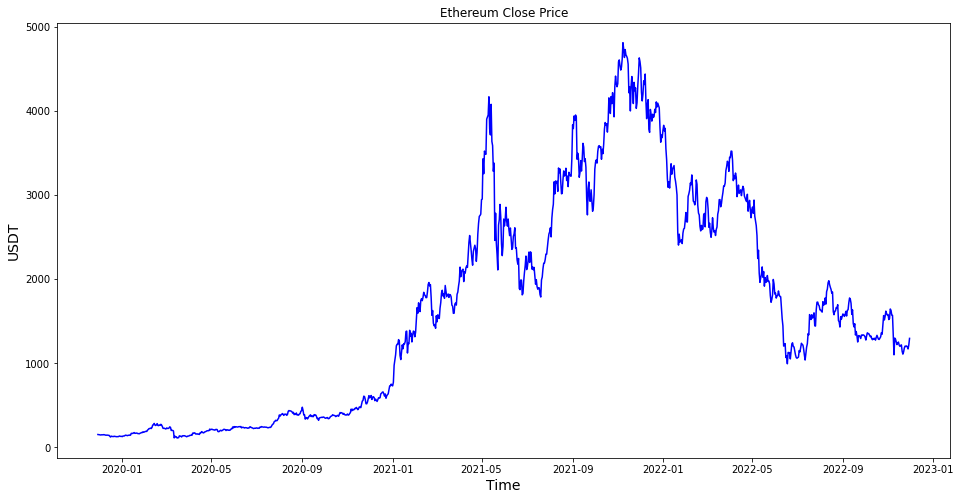

In [6]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="blue")
plt.title('Ethereum Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [7]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,155.286407,156.691299,151.225342,152.539688,152.539688,6565950868
1,2019-12-01,152.491928,152.491928,147.067932,151.185730,151.185730,7102780298
2,2019-12-02,151.175476,152.116959,147.606796,149.059158,149.059158,6670561362
3,2019-12-03,149.058243,150.310425,146.001678,147.956421,147.956421,6204379850
4,2019-12-04,147.918381,150.680817,145.000885,146.747742,146.747742,7865937094
...,...,...,...,...,...,...,...
846,2022-03-25,3108.448975,3183.958008,3087.490723,3106.671387,3106.671387,17030503831
847,2022-03-26,3106.405273,3146.825439,3091.825439,3143.178955,3143.178955,8876420740
848,2022-03-27,3143.795654,3291.577637,3129.997803,3291.577637,3291.577637,13431866834
849,2022-03-28,3292.322510,3424.019287,3279.027100,3336.634521,3336.634521,20620450770


In [8]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,3385.289307,3435.128418,3272.934570,3281.642822,3281.642822,17685495686
853,2022-04-01,3282.576172,3467.555908,3223.891357,3449.552246,3449.552246,20982988937
854,2022-04-02,3449.788574,3521.284668,3442.000244,3445.059326,3445.059326,23571556215
855,2022-04-03,3444.810547,3573.960205,3421.259766,3522.833496,3522.833496,15333808649
856,2022-04-04,3522.364990,3535.148193,3422.000977,3521.241211,3521.241211,18209969743
...,...,...,...,...,...,...,...
1092,2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
1093,2022-11-27,1205.905273,1220.349487,1195.039063,1195.126953,1195.126953,4486976868
1094,2022-11-28,1194.960327,1198.737671,1156.062500,1170.086182,1170.086182,7275411870
1095,2022-11-29,1169.874390,1222.164185,1163.477539,1216.901245,1216.901245,7639405818


# **Feature Engineering**

In [9]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,155.286407,156.691299,151.225342,152.539688,6565950868
1,152.491928,152.491928,147.067932,151.185730,7102780298
2,151.175476,152.116959,147.606796,149.059158,6670561362
3,149.058243,150.310425,146.001678,147.956421,6204379850
4,147.918381,150.680817,145.000885,146.747742,7865937094


In [10]:
#Normalizing training_data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00954954, 0.00851599, 0.0121226 , 0.00891928, 0.01835513],
       [0.00895493, 0.00763667, 0.01122329, 0.00863129, 0.02511843],
       [0.00867481, 0.00755815, 0.01133985, 0.00817897, 0.01967308],
       ...,
       [0.64544796, 0.6649428 , 0.65648039, 0.67658923, 0.10485608],
       [0.67705168, 0.69267531, 0.68871789, 0.68617278, 0.1954222 ],
       [0.68613716, 0.7023424 , 0.70083035, 0.70007335, 0.18172591]])

In [11]:
#Prepare train data
X_train = []
Y_train = []

In [12]:
training_data.shape[0]

851

In [13]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [14]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(791, 60, 5)

# Model Building

In [15]:
model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 5)))
model.add(GRU(10, activation='relu', input_shape=(X_train.shape[1],5)))
#model.add(GRU(20, activation='relu', return_sequences=True, input_shape=(length,1)))
#model.add(GRU(10, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10)                510       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 50, batch_size =32)

Epoch 1/50
25/25 [==============================] - 2s 23ms/step - loss: 9.1798e-04
Epoch 2/50
25/25 [==============================] - 1s 25ms/step - loss: 3.6854e-04
Epoch 3/50
25/25 [==============================] - 1s 23ms/step - loss: 2.9155e-04
Epoch 4/50
25/25 [==============================] - 1s 23ms/step - loss: 2.7189e-04
Epoch 5/50
25/25 [==============================] - 1s 23ms/step - loss: 2.5631e-04
Epoch 6/50
25/25 [==============================] - 1s 24ms/step - loss: 2.3145e-04
Epoch 7/50
25/25 [==============================] - 1s 24ms/step - loss: 2.1997e-04
Epoch 8/50
25/25 [==============================] - 1s 24ms/step - loss: 2.0473e-04
Epoch 9/50
25/25 [==============================] - 1s 24ms/step - loss: 1.9564e-04
Epoch 10/50
25/25 [==============================] - 1s 25ms/step - loss: 1.9936e-04
Epoch 11/50
25/25 [==============================] - 1s 24ms/step - loss: 1.7488e-04
Epoch 12/50
25/25 [==============================] - 1s 24ms/step - loss: 

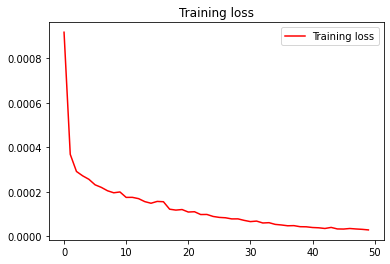

<Figure size 432x288 with 0 Axes>

In [17]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# **Performance Evaluation**

In [18]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2546.590576,2627.609375,2526.989746,2597.084717,11172062661
1,2598.564941,2631.408447,2550.460938,2603.466553,9501221177
2,2603.263428,2697.735352,2489.072266,2688.278809,13778234614
3,2687.898926,2802.315430,2682.621826,2792.117188,13194846235
4,2791.958984,2802.212158,2630.120361,2682.854004,13876301217


In [19]:
inputs = scaler.transform(df)
inputs

array([[0.51837398, 0.52591174, 0.52603977, 0.52887134, 0.07638571],
       [0.52943314, 0.52670725, 0.53111697, 0.53022875, 0.05533544],
       [0.53043289, 0.54059571, 0.51783759, 0.54826823, 0.10921983],
       ...,
       [0.23077255, 0.22671439, 0.22948551, 0.22535031, 0.02729335],
       [0.22543473, 0.23161976, 0.23108951, 0.23530782, 0.03187917],
       [0.235447  , 0.24834502, 0.24234238, 0.2520658 , 0.05956484]])

In [20]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [21]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((245, 60, 5), (245,))

In [22]:
Y_pred = model.predict(X_test)

8/8 [==============================] - 0s 6ms/step


In [23]:
print("RMSE: ", math.sqrt(mean_squared_error(Y_test,Y_pred)))
print("MSE: ", mean_squared_error(Y_test,Y_pred))
print("MAE: ", mean_absolute_error(Y_test,Y_pred))
print("R2 score:", r2_score(Y_test, Y_pred))

RMSE:  0.0055444161622107075
MSE:  3.074055057978331e-05
MAE:  0.0045719672374041065
R2 score: 0.9983220282010659


In [24]:
scaler.scale_

array([2.12781146e-04, 2.09394134e-04, 2.16316552e-04, 2.12698911e-04,
       1.25986030e-11])

In [25]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [26]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [27]:
# Y_test = scaler.inverse_transform(Y_test)
# Y_pred = scaler.inverse_transform(Y_pred) 

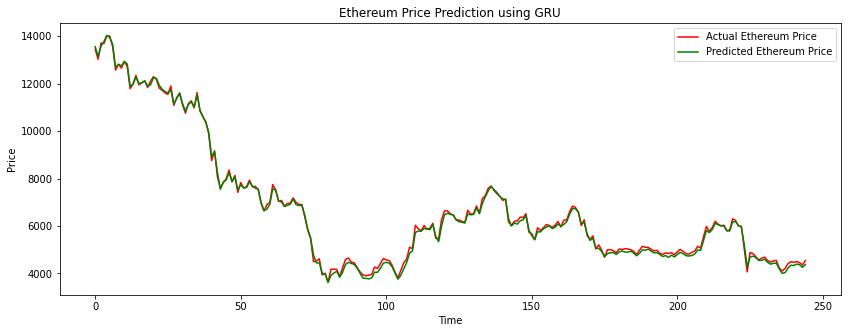

In [28]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Actual Ethereum Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()